In [5]:
import pandas as pd
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
import itertools
import scipy.stats
import datetime

In [6]:
df = pd.read_csv("/home/haziq/Documents/arima-rnn/latest/dataset/MSFT_timeseries.csv")[["Date"]]
df["Date"]=df["Date"].str[0:10]
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date    datetime64[ns]
dtype: object

In [7]:
df = pd.DataFrame(columns=["Date"])
directory = "/home/haziq/Documents/arima-rnn/latest/dataset/"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(f"Filename is {filename}")
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            print(f"file path is {f}")
            name = re.search(r'/(.*?)_', f).group(1).split('/')[6]
            temp_df = pd.read_csv(f)[["Date","Close"]]
            temp_df["Date"]=temp_df["Date"].str[0:10]
            temp_df["Date"] = pd.to_datetime(temp_df["Date"])
            df = pd.merge(df, temp_df, on="Date", how="outer")
            df=df.rename(columns={"Close":name})
            ##print(len(temp_df))
            del temp_df

Filename is TSLA_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/TSLA_timeseries.csv
Filename is SHEL_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/SHEL_timeseries.csv
Filename is JNJ_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/JNJ_timeseries.csv
Filename is XOM_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/XOM_timeseries.csv
Filename is MSFT_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/MSFT_timeseries.csv
Filename is GOOG_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/GOOG_timeseries.csv
Filename is JPM_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/JPM_timeseries.csv
Filename is TM_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/TM_timeseries.csv
Filename is AZN_timeseries.csv
file path is /home/haziq/Documents/arima-rnn/latest/dataset/AZN_timeseries.csv


In [8]:
df

,Date,TSLA,SHEL,JNJ,XOM,MSFT,GOOG,JPM,TM,AZN
0,2014-04-30,13.859333,46.445408,77.124062,66.463768,34.210922,26.260900,42.379726,100.839981,28.289917
1,2014-05-01,13.848667,46.628269,76.545364,65.814789,33.872192,26.494759,42.182884,102.058403,29.019978
2,2014-05-02,14.060667,46.852406,75.616447,66.204178,33.609692,26.324226,42.076904,102.244415,28.994921
3,2014-05-05,14.440667,46.876015,76.141815,66.788292,33.389519,26.318243,41.047306,101.788673,28.583368
4,2014-05-06,13.818667,46.876015,75.768723,66.632507,33.076202,25.686478,40.381107,101.379440,28.314970
...,...,...,...,...,...,...,...,...,...,...
2513,2024-04-24,162.130005,73.129997,148.529999,121.050003,409.059998,161.100006,193.080002,232.880005,71.199997
2514,2024-04-25,170.179993,73.269997,146.820007,121.330002,399.040009,157.949997,193.369995,225.360001,75.029999
2515,2024-04-26,168.289993,73.269997,146.139999,117.959999,406.320007,173.690002,193.490005,226.710007,75.169998
2516,2024-04-29,194.050003,73.120003,146.820007,119.639999,402.250000,167.899994,193.279999,227.940002,75.480003


In [9]:
df.to_csv("compiled_dataset.csv")

In [10]:
sns.set_theme(style="darkgrid")

/tmp/ipykernel_41355/2972560436.py:3: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  ax=sns.lineplot(x='Date', y='value', hue='variable',


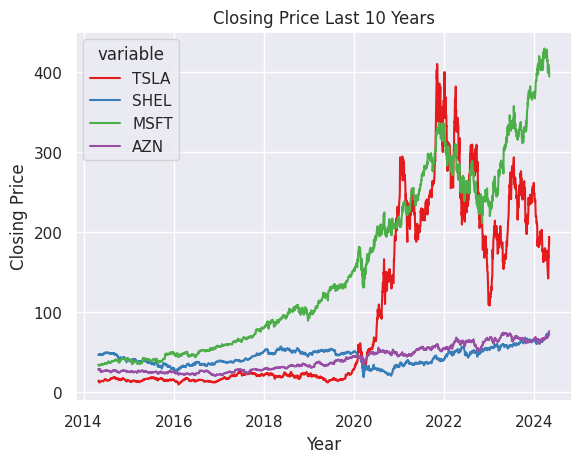

In [11]:
df_plot=df[["Date","TSLA", "SHEL", "MSFT", "AZN"]]

ax=sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(df_plot, ['Date']),
             palette=sns.color_palette("Set1"))

ax.set(xlabel='Year',
       ylabel='Closing Price',
       title='Closing Price Last 10 Years')

plt.show()


In [12]:
# Build a list of unique pairs
col = list(filter(lambda x: x != 'Date', df.columns))

pairs=list(itertools.combinations(col, 2))
len(pairs)

36

In [26]:
final_df = pd.DataFrame()
for pair in pairs:
    name = pair[0] + '_' + pair[1]
    start_index=0
    end_index=100
    temp_df = df[["Date",pair[0],pair[1]]]
    print(temp_df)
    cor_list,p_list=[],[]

    while(start_index<=2418):
        temp_df2=temp_df.iloc[start_index:end_index]
        start_index=end_index
        end_index+=100
        #print(start_index)
        cor_obj=scipy.stats.pearsonr(temp_df2[pair[0]],temp_df2[pair[1]])
        #print(cor)
        cor_list.append(cor_obj[0])
        p_list.append(cor_obj[1])
        del temp_df2

    final_df[name] = cor_list
    final_df[name+"_p_value"] = p_list
    del temp_df
    del cor_list
    del p_list

           Date        TSLA       SHEL
0    2014-04-30   13.859333  46.445408
1    2014-05-01   13.848667  46.628269
2    2014-05-02   14.060667  46.852406
3    2014-05-05   14.440667  46.876015
4    2014-05-06   13.818667  46.876015
...         ...         ...        ...
2513 2024-04-24  162.130005  73.129997
2514 2024-04-25  170.179993  73.269997
2515 2024-04-26  168.289993  73.269997
2516 2024-04-29  194.050003  73.120003
2517 2024-04-30  184.705002  71.985001

[2518 rows x 3 columns]
           Date        TSLA         JNJ
0    2014-04-30   13.859333   77.124062
1    2014-05-01   13.848667   76.545364
2    2014-05-02   14.060667   75.616447
3    2014-05-05   14.440667   76.141815
4    2014-05-06   13.818667   75.768723
...         ...         ...         ...
2513 2024-04-24  162.130005  148.529999
2514 2024-04-25  170.179993  146.820007
2515 2024-04-26  168.289993  146.139999
2516 2024-04-29  194.050003  146.820007
2517 2024-04-30  184.705002  145.250000

[2518 rows x 3 columns]
  

In [27]:
final_df

,TSLA_SHEL,TSLA_SHEL_p_value,TSLA_JNJ,TSLA_JNJ_p_value,TSLA_XOM,TSLA_XOM_p_value,TSLA_MSFT,TSLA_MSFT_p_value,TSLA_GOOG,TSLA_GOOG_p_value,...,GOOG_TM,GOOG_TM_p_value,GOOG_AZN,GOOG_AZN_p_value,JPM_TM,JPM_TM_p_value,JPM_AZN,JPM_AZN_p_value,TM_AZN,TM_AZN_p_value
0,0.262714,8.274315e-03,0.532867,1.149670e-08,-0.605084,2.595938e-11,0.856656,6.327544e-30,0.657073,1.134218e-13,...,0.836083,2.681775e-27,-0.383693,8.126798e-05,0.651697,2.089153e-13,-0.112905,2.633801e-01,-0.306215,1.945432e-03
1,0.839033,1.187437e-27,0.378152,1.048668e-04,0.710529,1.234545e-16,0.339748,5.437297e-04,0.781934,7.831147e-22,...,-0.462538,1.266576e-06,0.189603,5.884307e-02,0.011265,9.114253e-01,0.421722,1.243417e-05,0.130930,1.941388e-01
2,-0.316130,1.354638e-03,-0.153182,1.281193e-01,-0.157742,1.170181e-01,0.734618,3.359064e-18,-0.627311,2.879369e-12,...,0.139820,1.653042e-01,0.325257,9.601768e-04,-0.167974,9.481747e-02,-0.458735,1.586981e-06,0.743548,7.979975e-19
3,0.122908,2.231299e-01,-0.297298,2.666027e-03,-0.314951,1.415117e-03,-0.608925,1.797103e-11,-0.592193,8.611958e-11,...,0.098001,3.320343e-01,0.137252,1.732878e-01,0.842337,4.674755e-28,0.539831,6.793466e-09,0.449113,2.774373e-06
4,0.541890,5.801561e-09,0.457035,1.753739e-06,0.267091,7.224369e-03,0.826005,3.855625e-26,0.795982,4.329182e-23,...,0.472610,6.878463e-07,0.563119,1.069379e-09,0.685175,3.764076e-15,0.745086,6.193611e-19,0.896606,1.917645e-36
5,0.139307,1.668777e-01,0.037405,7.117737e-01,-0.034371,7.342405e-01,0.012090,9.049679e-01,0.053000,6.004858e-01,...,0.883298,5.196610e-34,0.907557,1.041690e-38,0.835435,3.200041e-27,0.759669,5.096423e-20,0.884785,2.876853e-34
6,0.623446,4.274122e-12,-0.177661,7.699879e-02,-0.144561,1.512918e-01,0.612332,1.291454e-11,0.761205,3.877124e-20,...,0.387342,6.853782e-05,-0.054626,5.893415e-01,0.566413,8.137198e-10,-0.772064,5.284862e-21,-0.250552,1.192832e-02
7,0.601133,3.770360e-11,0.699867,5.426244e-16,0.214417,3.217770e-02,0.892053,1.414843e-35,0.817023,3.605606e-25,...,-0.589298,1.119288e-10,0.868411,1.285359e-31,0.584135,1.774811e-10,-0.458437,1.615062e-06,-0.664497,4.779714e-14
8,-0.270553,6.479200e-03,-0.386836,7.018507e-05,-0.410265,2.242521e-05,-0.468844,8.662259e-07,-0.605927,2.395734e-11,...,0.765101,1.920292e-20,0.613412,1.162090e-11,0.837138,2.007676e-27,0.640143,7.455160e-13,0.589051,1.144410e-10
9,0.223637,2.530837e-02,0.484895,3.179790e-07,0.453973,2.096836e-06,0.155032,1.235217e-01,0.735957,2.718026e-18,...,0.712650,9.123300e-17,0.246330,1.349162e-02,0.659653,8.422687e-14,0.503586,9.264324e-08,0.333566,6.953598e-04


In [28]:
final_df.to_csv("correlation_p_value.csv")

In [29]:
column_names = [col for col in final_df.columns if not col.endswith('value')]
final_df[column_names].to_csv("correlation.csv")

In [30]:
column_names = [col for col in final_df.columns if  col.endswith('value')]
final_df[column_names].to_csv("p_value.csv")